In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Validation Initial Inspection

In [2]:
credit_risk_dataset = pd.read_csv(
    filepath_or_buffer = "../data/raw/credit_risk_dataset.csv"
    )

In [3]:
credit_risk_dataset.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
credit_risk_dataset.tail(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [5]:
credit_risk_dataset.shape

(32581, 12)

In [6]:
credit_risk_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
credit_risk_dataset.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [8]:
credit_risk_dataset.index

RangeIndex(start=0, stop=32581, step=1)

In [9]:
credit_risk_dataset.axes

[RangeIndex(start=0, stop=32581, step=1),
 Index(['person_age', 'person_income', 'person_home_ownership',
        'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
        'loan_int_rate', 'loan_status', 'loan_percent_income',
        'cb_person_default_on_file', 'cb_person_cred_hist_length'],
       dtype='object')]

In [10]:
credit_risk_dataset.size

390972

In [11]:
target = credit_risk_dataset.loan_status

In [12]:
credit_risk_dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [13]:
credit_risk_dataset.describe(include='O')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


#### note: Majority of people are around 27 years old who rent their living spaces and are getting high interest rates for education - most of them did not default on their loans, so there is an imbalance problem.

### Data Quality Assessment

#### Removing Impossible Values

In [14]:
credit_risk_dataset.person_emp_length.sort_values(ascending=False)

210      123.0
0        123.0
32355     41.0
32515     38.0
32428     34.0
         ...  
32285      NaN
32328      NaN
32360      NaN
32453      NaN
32471      NaN
Name: person_emp_length, Length: 32581, dtype: float64

In [15]:
credit_risk_dataset[credit_risk_dataset.person_emp_length > 41.0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [16]:
print("size of dataset before filtering for impossible values from persons employment length:", credit_risk_dataset.shape)

size of dataset before filtering for impossible values from persons employment length: (32581, 12)


In [17]:
credit_risk_dataset = credit_risk_dataset[~(credit_risk_dataset.person_emp_length > 41.0)]

In [18]:
print("size of dataset after filtering impossible values from persons employment length:", credit_risk_dataset.shape)

size of dataset after filtering impossible values from persons employment length: (32579, 12)


In [19]:
credit_risk_dataset.person_age.sort_values(ascending=False)

32297    144
81       144
183      144
575      123
747      123
        ... 
9926      20
7748      20
7327      20
5648      20
3851      20
Name: person_age, Length: 32579, dtype: int64

In [20]:
credit_risk_dataset[credit_risk_dataset.person_age > 94]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [21]:
print("Shape of dataset before filtering out impossible age values", credit_risk_dataset.shape)

Shape of dataset before filtering out impossible age values (32579, 12)


In [22]:
credit_risk_dataset = credit_risk_dataset[~(credit_risk_dataset.person_age > 94)]

In [23]:
print("Shape of dataset after filtering out impossible age values", credit_risk_dataset.shape)

Shape of dataset after filtering out impossible age values (32574, 12)


In [24]:
credit_risk_dataset[credit_risk_dataset.person_emp_length > credit_risk_dataset.person_age]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


#### Correcting Data Types (If needed)

In [25]:
credit_risk_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           31679 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               29459 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [26]:
credit_risk_dataset.person_home_ownership.value_counts()

person_home_ownership
RENT        16442
MORTGAGE    13441
OWN          2584
OTHER         107
Name: count, dtype: int64

In [27]:
credit_risk_dataset = credit_risk_dataset.astype(
    {"person_home_ownership": "category"}
    )

In [28]:
credit_risk_dataset.loan_intent.value_counts()

loan_intent
EDUCATION            6451
MEDICAL              6071
VENTURE              5716
PERSONAL             5519
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [29]:
credit_risk_dataset = credit_risk_dataset.astype(
    {"loan_intent": "category"}
    )

In [30]:
credit_risk_dataset.loan_grade.value_counts()

loan_grade
A    10776
B    10448
C     6456
D     3625
E      964
F      241
G       64
Name: count, dtype: int64

In [31]:
credit_risk_dataset = credit_risk_dataset.astype(
    {"loan_grade" : "category"}
)

In [32]:
credit_risk_dataset.cb_person_default_on_file.value_counts()

cb_person_default_on_file
N    26830
Y     5744
Name: count, dtype: int64

In [33]:
credit_risk_dataset.replace({"cb_person_default_on_file": {"Y": 1, "N": 0}}, inplace=True)

C:\Users\billy\AppData\Local\Temp\ipykernel_20184\3800854153.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit_risk_dataset.replace({"cb_person_default_on_file": {"Y": 1, "N": 0}}, inplace=True)


In [34]:
credit_risk_dataset = credit_risk_dataset.astype(
    {"cb_person_default_on_file": "bool"}
)

In [35]:
credit_risk_dataset = credit_risk_dataset.astype(
    {"loan_status": "bool"}
)

In [36]:
credit_risk_dataset.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,False,0.10,False,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,True,0.57,False,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,True,0.53,False,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,True,0.55,True,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,True,0.25,False,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,True,0.45,False,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,True,0.44,False,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,True,0.42,False,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,True,0.16,False,3
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,True,0.41,False,4


#### Missing values

In [37]:
credit_risk_dataset.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### Duplicated Values

In [38]:
credit_risk_dataset.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32574, dtype: bool

In [39]:
credit_risk_dataset[credit_risk_dataset.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,False,0.14,False,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,False,0.09,False,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,False,0.08,False,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,True,0.30,False,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,False,0.15,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,False,0.06,False,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,False,0.08,False,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,False,0.10,False,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,False,0.03,False,16


#### Outlier Visualization

In [40]:
numeric_features = credit_risk_dataset.select_dtypes(include=["int64", "float64"]).columns

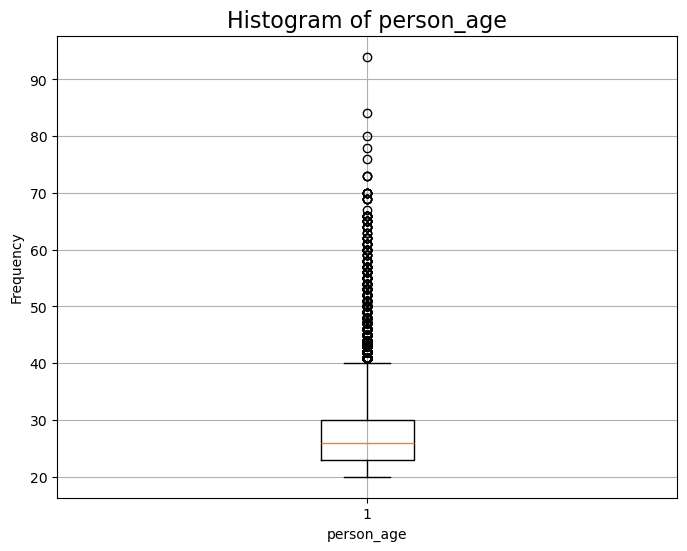

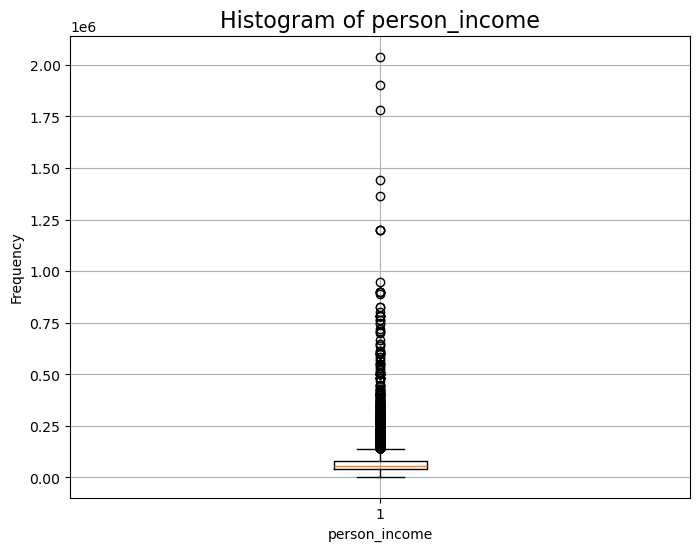

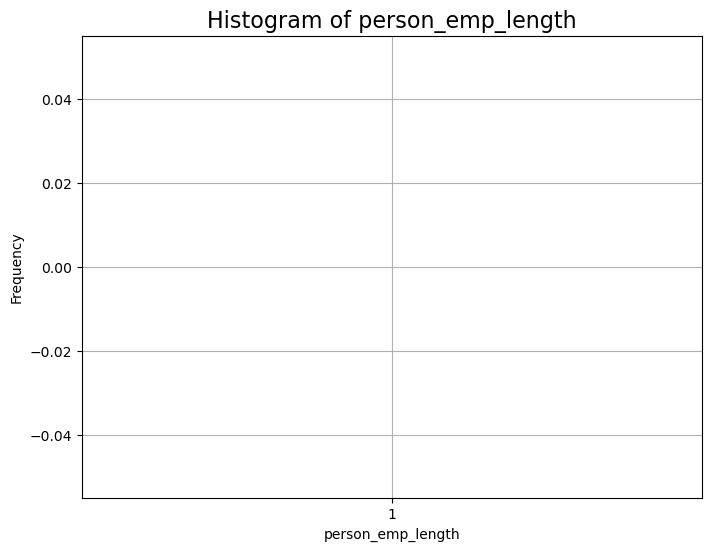

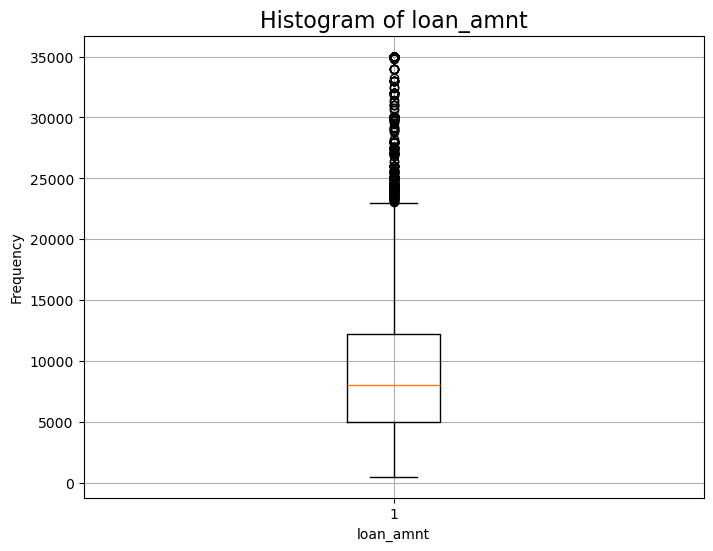

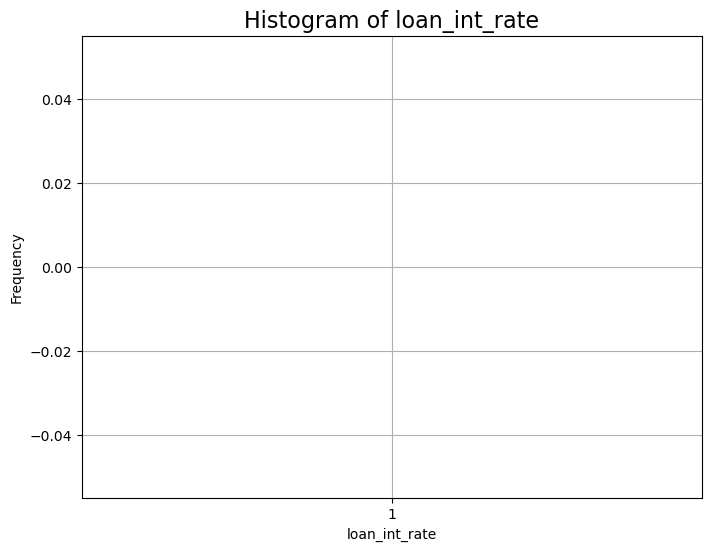

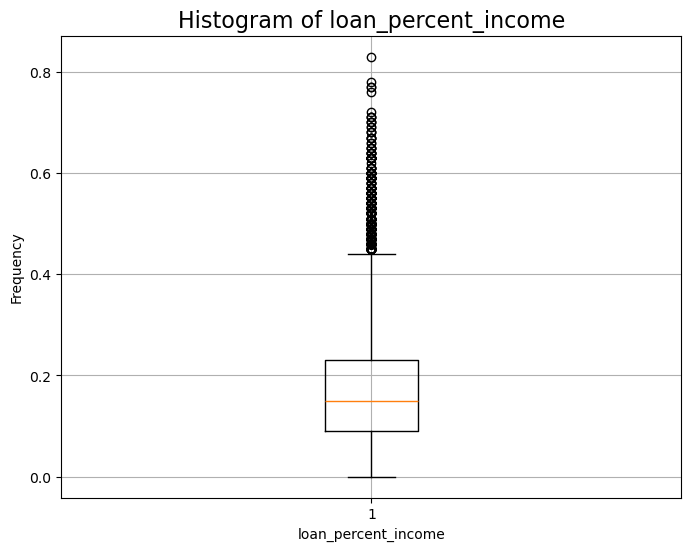

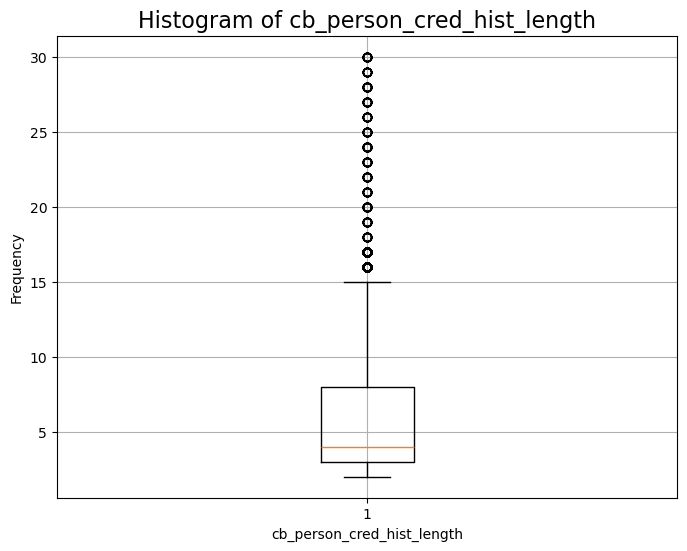

In [41]:
for column in numeric_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(credit_risk_dataset[column])
    plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Univariate Analysis

In [42]:
credit_risk_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32574 non-null  int64   
 1   person_income               32574 non-null  int64   
 2   person_home_ownership       32574 non-null  category
 3   person_emp_length           31679 non-null  float64 
 4   loan_intent                 32574 non-null  category
 5   loan_grade                  32574 non-null  category
 6   loan_amnt                   32574 non-null  int64   
 7   loan_int_rate               29459 non-null  float64 
 8   loan_status                 32574 non-null  bool    
 9   loan_percent_income         32574 non-null  float64 
 10  cb_person_default_on_file   32574 non-null  bool    
 11  cb_person_cred_hist_length  32574 non-null  int64   
dtypes: bool(2), category(3), float64(3), int64(4)
memory usage: 2.1 MB


In [43]:
numeric_features = credit_risk_dataset.select_dtypes(
    include = ["int64", "float64"]
)

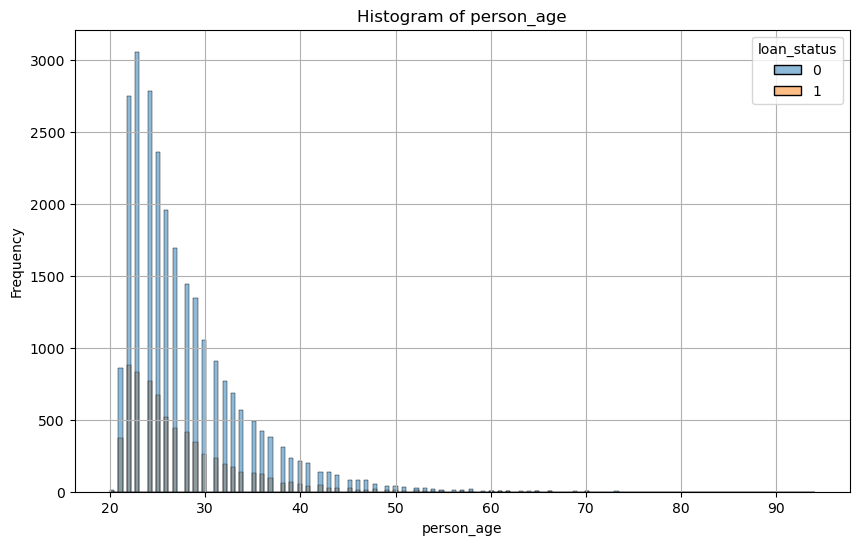

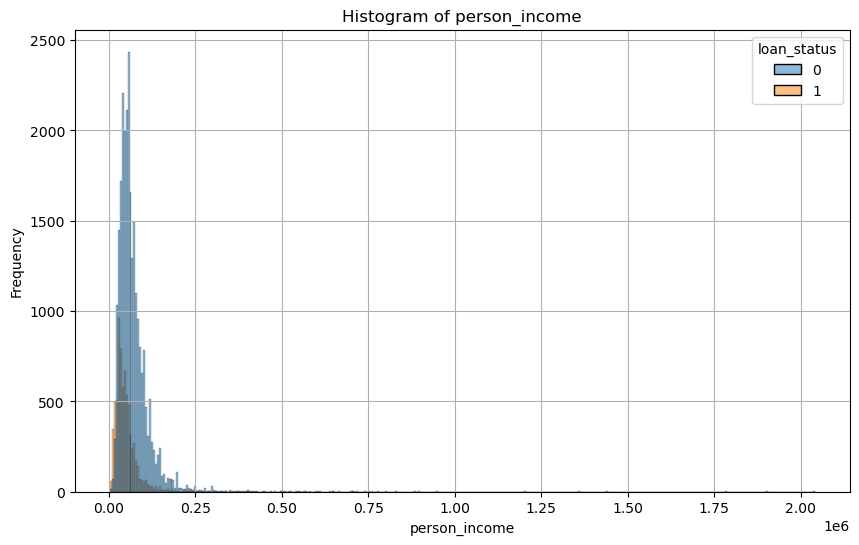

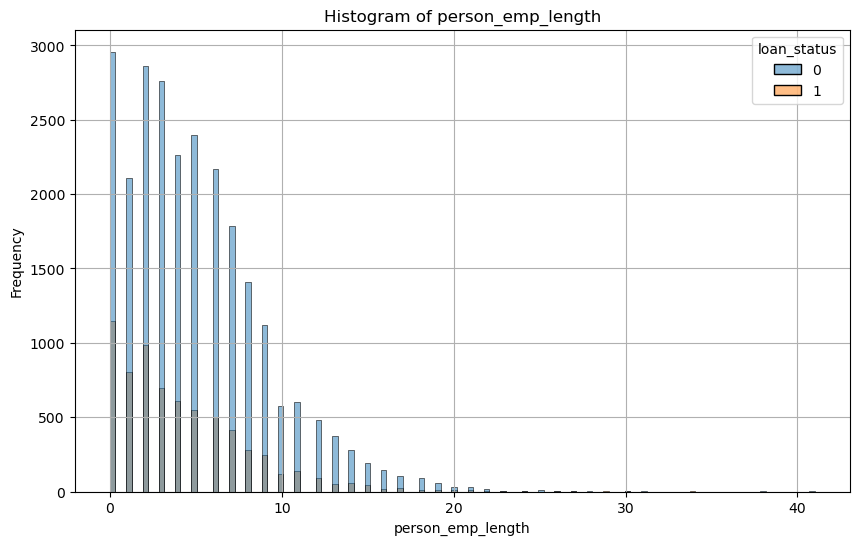

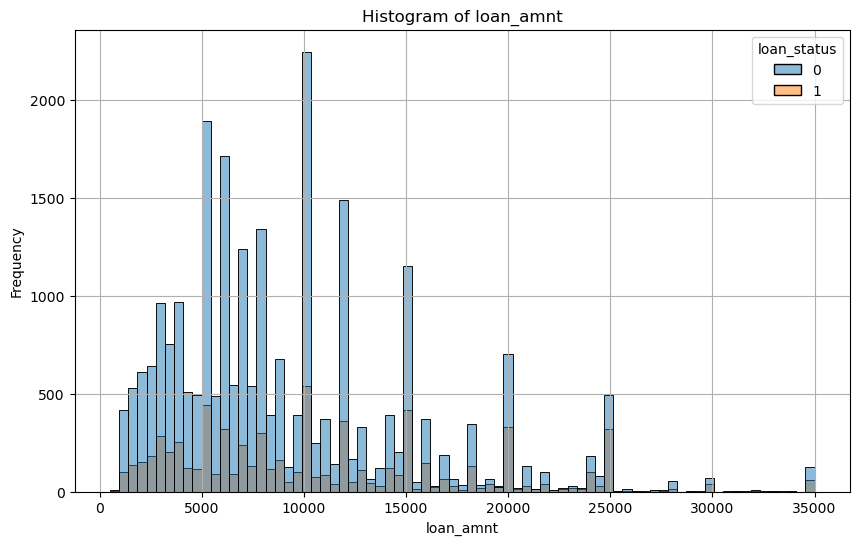

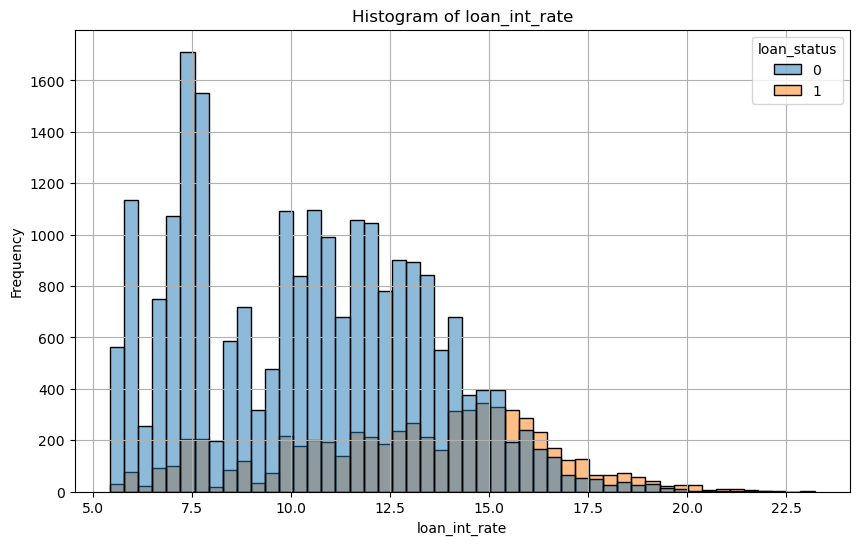

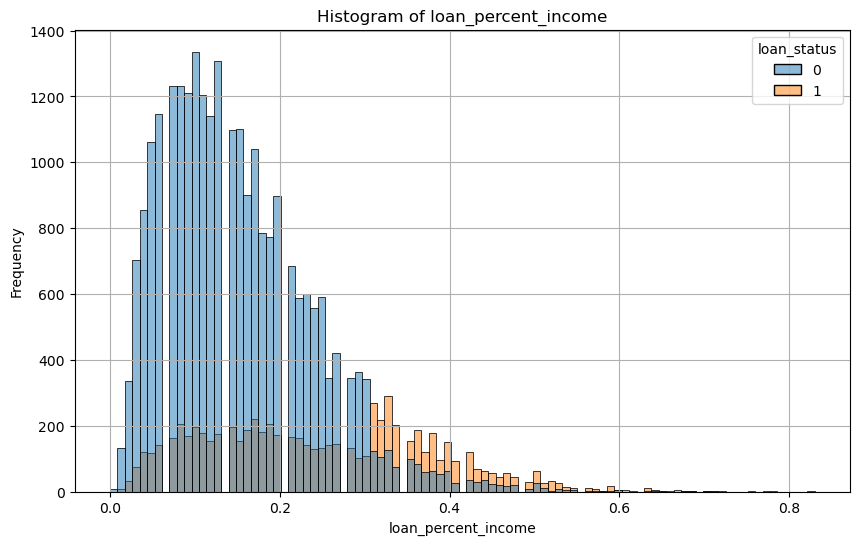

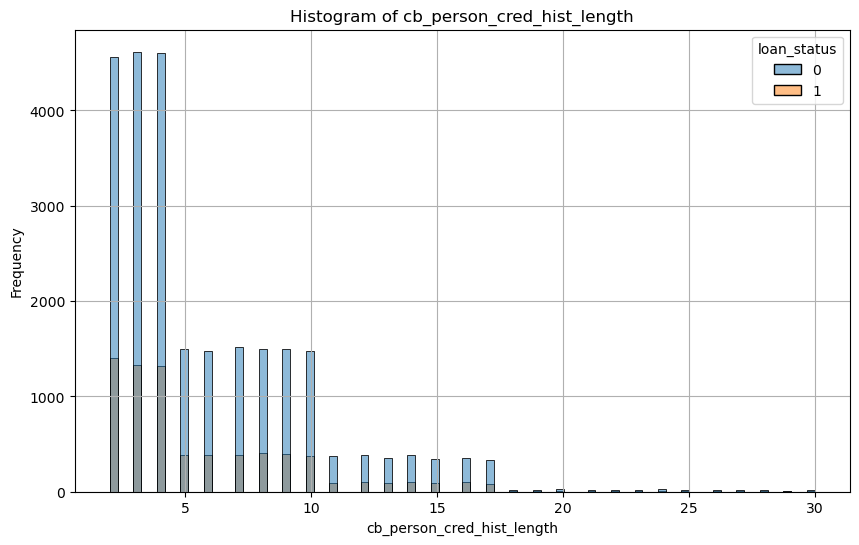

In [44]:
for numeric_feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.histplot(x= numeric_feature,
                 hue= target,
                 data= credit_risk_dataset)
    plt.title(f"Histogram of {numeric_feature}")
    plt.xlabel(numeric_feature)
    plt.ylabel("Frequency")
    plt.grid(visible=True)

In [45]:
categorical_features = credit_risk_dataset.select_dtypes(include=['category']).columns

In [46]:
categorical_features

Index(['person_home_ownership', 'loan_intent', 'loan_grade'], dtype='object')

In [47]:
for categorical_feature in categorical_features:
    print(categorical_feature)

person_home_ownership
loan_intent
loan_grade


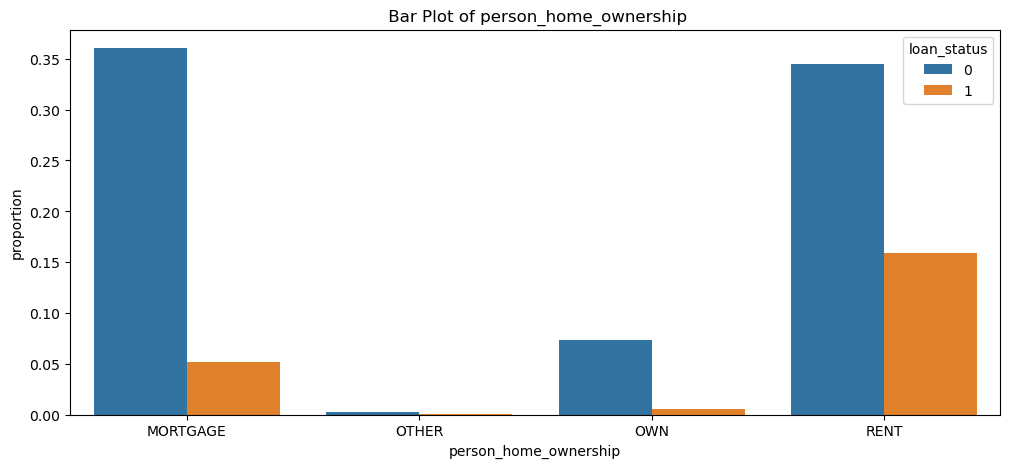

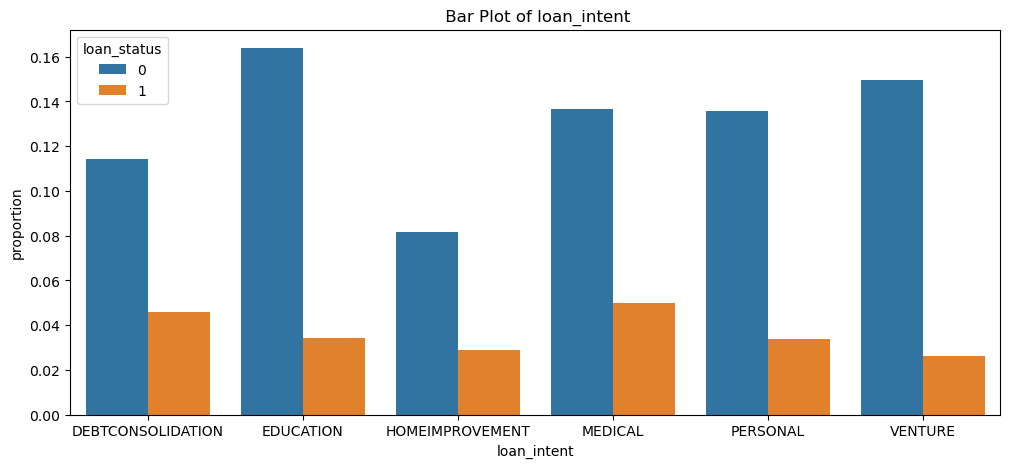

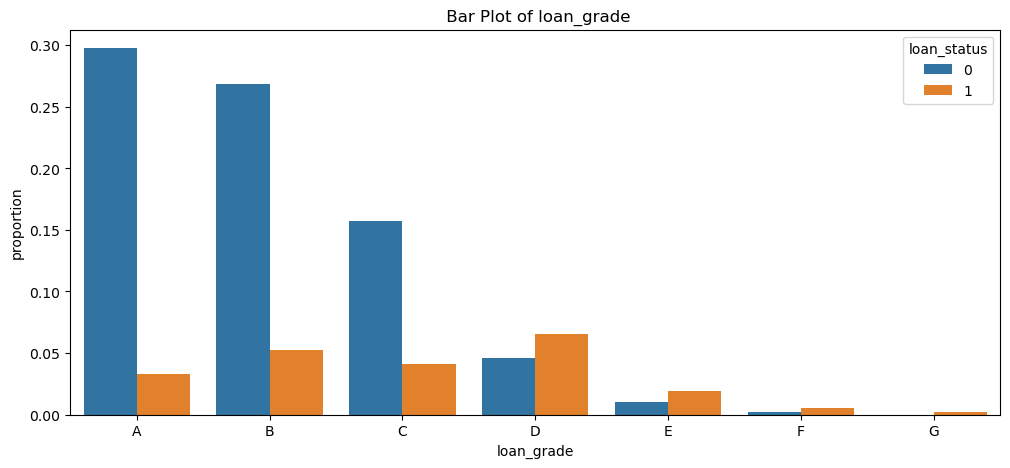

In [48]:
for categorical_feature in categorical_features:
    plt.figure(
        figsize=(12,5)
    )
    sns.countplot(
        x= categorical_feature,
        data= credit_risk_dataset,
        hue = target,
        stat = 'proportion')
    plt.title(f" Bar Plot of {categorical_feature}")

In [49]:
bool_features = credit_risk_dataset.select_dtypes(
    include = 'bool'
    ).columns

In [50]:
bool_features

Index(['loan_status', 'cb_person_default_on_file'], dtype='object')

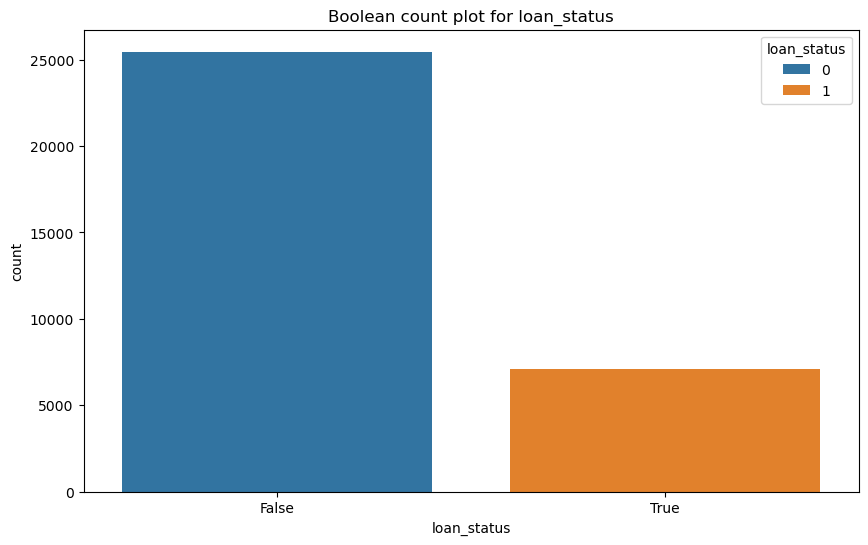

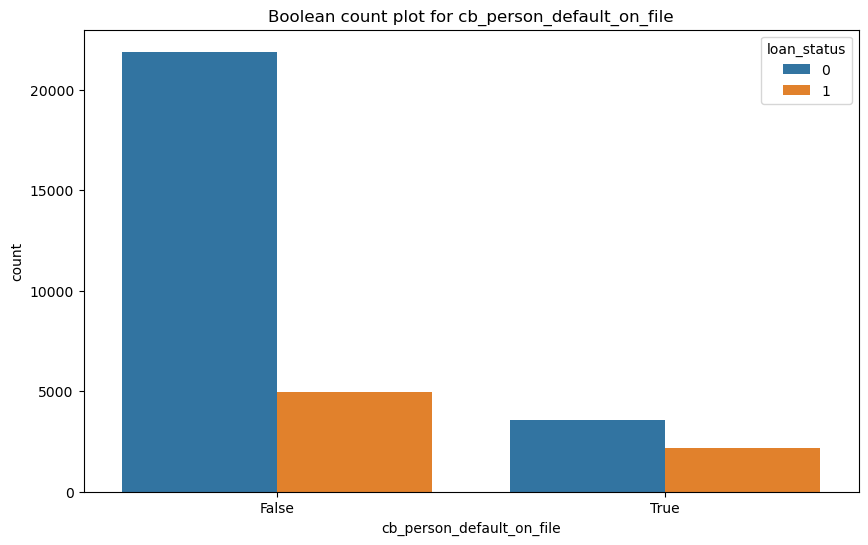

In [51]:
for bool_feature in bool_features:
    plt.figure(figsize=(10,6))
    sns.countplot(
        data= credit_risk_dataset,
        x= bool_feature,
        hue=target
        )
    plt.title(f"Boolean count plot for {bool_feature}")

#### There is an imbalance in the target variable.

### Bivariate Analysis

In [ ]:
for numeric_feature in numeric_features:
    for categorical_feature in categorical_features:
        plt.figure(
            figsize=(10,6)
            )
        sns.stripplot(
            data= credit_risk_dataset,
            x= categorical_feature,
            y= numeric_feature,
            hue= target
        )

In [ ]:
for numeric_feature in numeric_features:
    for categorical_feature in categorical_features:
        plt.figure(
            figsize=(10,6)
            )
        sns.violinplot(
            data= credit_risk_dataset,
            x= categorical_feature,
            y= numeric_feature,
            hue= target
        )

In [ ]:
for numeric_feature in numeric_features:
    for categorical_feature in categorical_features:
        plt.figure(
            figsize=(10,6)
            )
        sns.barplot(
            data= credit_risk_dataset,
            x= categorical_feature,
            y= numeric_feature,
            hue= target
        )

In [ ]:
for numeric_feature in numeric_features:
    for categorical_feature in categorical_features:
        plt.figure(
            figsize=(10,6)
            )
        sns.pointplot(
            data= credit_risk_dataset,
            x= categorical_feature,
            y= numeric_feature,
            hue= target
        )

### Correlations

<Axes: >

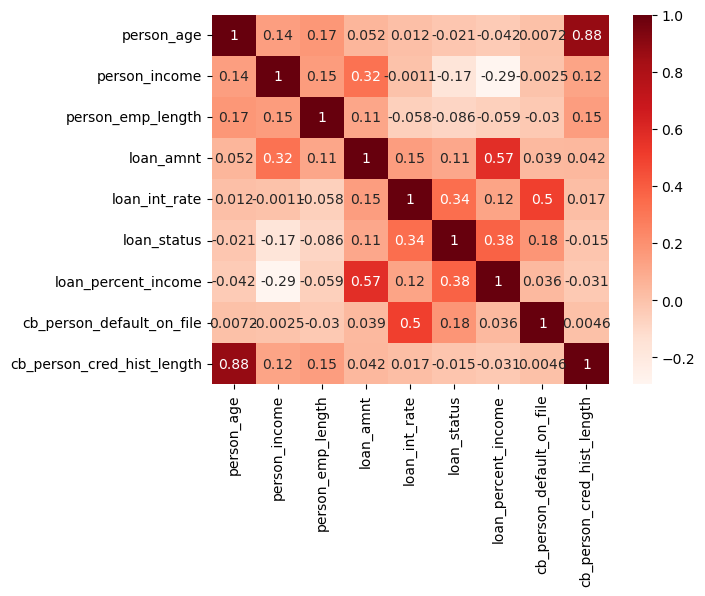

In [59]:
sns.heatmap(credit_risk_dataset.corr(numeric_only=True), annot=True, cmap ='Reds')

In [ ]:
pd.crosstab(
  index= target,
  columns=  credit_risk_dataset.loan_intent
)

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
loan_status,,,,,,
0,3722,5340,2664,4450,4422,4869
1,1490,1111,941,1621,1097,847


In [ ]:
pd.crosstab(
  index= target,
  columns=  credit_risk_datasSet.loan_intent,
  values= credit_risk_dataset.person_income,
  aggfunc= 'mean'
)

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
loan_status,,,,,,
0,71588.914293,67718.332397,82085.335210,65422.364494,71714.860923,70199.567468
1,53686.085906,46776.364536,49384.174283,50497.152375,46942.396536,44088.696576
